In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
candidates = pd.read_csv('../data/candidates.csv')

candidates.head()

,state_name,district,candidate_name,party,incumbent,winner,perc_vote,money_raised,money_spent
0,AL,1,Jerry Carl,R,not incumbent,1,64.9,1971321,1859349
1,AL,1,James Averhart,D,not incumbent,0,35.0,80095,78973
2,AL,2,Barry Moore,R,not incumbent,1,65.3,650807,669368
3,AL,2,Phyllis Harvey-Hall,D,not incumbent,0,34.6,56050,55988
4,AL,3,Mike D Rogers,R,Incumbent,1,67.5,1193111,1218564


In [30]:
candidates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state_name      892 non-null    object 
 1   district        892 non-null    int64  
 2   candidate_name  892 non-null    object 
 3   party           892 non-null    object 
 4   incumbent       892 non-null    object 
 5   winner          892 non-null    int64  
 6   perc_vote       892 non-null    float64
 7   money_raised    892 non-null    int64  
 8   money_spent     892 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.8+ KB


In [31]:
candidates['party'].value_counts()

D    423
R    387
I     46
L     21
3     15
Name: party, dtype: int64

### How often does the candidate who raised more money win a race?

Partition by state and district, sort by money_raised, qualify row_num = 1 (to only have the person from each race who raised the most money). Chart value_counts of winner column.

In [32]:
# new column with max raised in each district race
candidates['max_raised'] = candidates.groupby(['state_name', 'district'])['money_raised'].transform('max')

In [33]:
raised_winner = candidates.loc[candidates['money_raised'] == candidates['max_raised']]

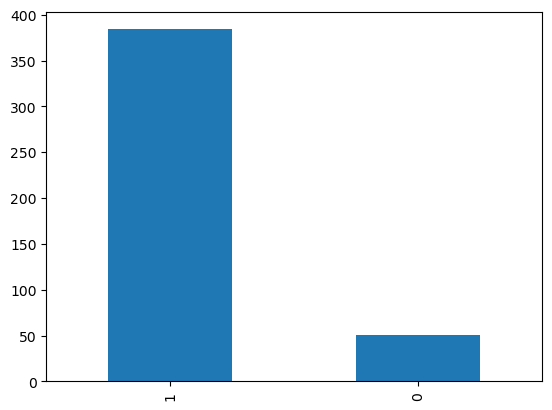

In [34]:
raised_winner['winner'].value_counts().plot.bar();

#### How often does the candidate who spent more money win a race?

Same strategy as previous question.

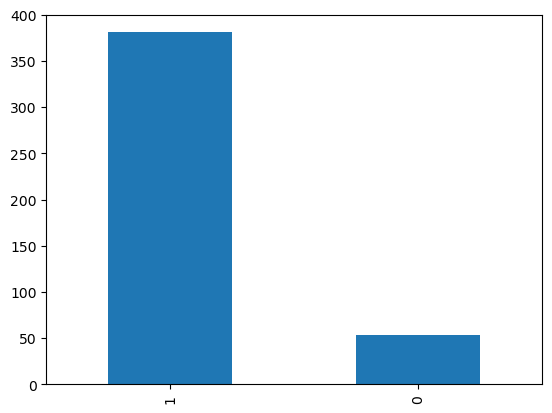

In [35]:
# new column with max spent in each district race
candidates['max_spent'] = candidates.groupby(['state_name', 'district'])['money_spent'].transform('max')

spent_winner = candidates.loc[candidates['money_spent'] == candidates['max_spent']]

spent_winner['winner'].value_counts().plot.bar();

#### Does the difference between either money raised or money spent seem to influence the likelihood of a candidate winning a race?